This code contains main definitions between pressure, temperature and liquid level state in superfluid helium vacuum pumping system.

In [1]:
# ondoing main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time
from dateutil import parser
%matplotlib inline

In [2]:
# hiding possible wenaning in the system
import warnings
warnings.filterwarnings('ignore')

# Additional functions

In [3]:
# helps to parse the experiment's date
def dataparser(dataframe):
    for i in range(len(dataframe["TotalTime"])):
        dataframe['TotalTime'][i] = dataframe['Date'][i] + " " + dataframe['Time'][i]
        dataframe['TotalTime'][i] = parser.parse(dataframe["TotalTime"][i])

In [4]:
# entering a deltatime between to moments of experiments
def deltatime(dataframe):
    begin = dataframe["TotalTime"][0]
    for i in range(len(dataframe["TotalTime"])):   
        cur = dataframe["TotalTime"][i]
        delta = cur - begin
        dataframe["TotalTime"][i] = delta.seconds

In [5]:
# building presurre plots
def pressure_plot(df1, df2, df3):
    x_data = [df1['TotalTime'], df2['TotalTime'], df3['TotalTime']]
    y_data = [df1['Pressure, kPa'], df2['Pressure, kPa'], df3['Pressure, kPa']]
    plt.figure(figsize=(20, 20))
    colormap = ["red", "green", "blue"]
    sensors = ['1', '2', '4']
    
    for i in range(1,4,1):
        ax = plt.subplot(2,2,i)
        plt.plot(x_data[i-1], y_data[i-1], color=colormap[i-1], label="Sensor" + sensors[i-1])
        plt.xlabel("Time, sec")
        plt.ylabel("Pressure, kPa")
        plt.grid(True)
        plt.legend()

In [6]:
# convert the pressure data type to sting type
def strtofloat(dataframe):
    for i in range(len(dataframe["Pressure, kPa"])):
        dataframe["Pressure, kPa"][i] = float(dataframe["Pressure, kPa"][i].replace(',','.'))
    return(dataframe)

# Pressure data analisys

In [7]:
sensor_surf = pd.read_csv("presLogsOnSurf.xls", delimiter=',')
sensor_surf.head()

,"Pressure, kPa",Date,Time
0,4.74,12.12.2020,14:59:06
1,4.74,12.12.2020,14:59:08
2,4.74,12.12.2020,14:59:10
3,4.74,12.12.2020,14:59:12
4,4.75,12.12.2020,14:59:14


In [8]:
sensor_surf['TotalTime'] = 0
dataparser(sensor_surf)

In [9]:
deltatime(sensor_surf)

In [10]:
sensor_1 = pd.read_csv("presSensor_1.xls", delimiter=',')
sensor_2 = pd.read_csv("presSensor_2.xls", delimiter=',')
sensor_4 = pd.read_csv("presSensor_4.xls", delimiter=',')

In [11]:
sensor_1.head()

,"Pressure, kPa",Time,Date
0,"-0,0036326 MPa",15:05:51.191,12.12.20
1,"-0,0036453 MPa",15:05:52.194,12.12.20
2,"-0,0036319 MPa",15:05:53.209,12.12.20
3,"-0,0035816 MPa",15:05:54.209,12.12.20
4,"-0,0035651 MPa",15:05:55.226,12.12.20


In [12]:
sensor_2.head()

,"Pressure, kPa",Time,Date
0,"0,1162872",15:05:51.503,12.12.20
1,"0,1157150",15:05:52.506,12.12.20
2,"0,1151505",15:05:53.521,12.12.20
3,"0,1162872",15:05:54.524,12.12.20
4,"0,1168976",15:05:55.538,12.12.20


In [13]:
sensor_4.head()

,"Pressure, kPa",Time,Date
0,"-101,6285000",15:05:51.818,12.12.20
1,"-101,6302000",15:05:52.816,12.12.20
2,"-101,6308000",15:05:53.834,12.12.20
3,"-101,6302000",15:05:54.837,12.12.20
4,"-101,6330000",15:05:55.851,12.12.20


In [14]:
sensor_1['TotalTime'] = 0
dataparser(sensor_1)

In [15]:
sensor_2['TotalTime'] = 0
dataparser(sensor_2)

In [16]:
sensor_4['TotalTime'] = 0
dataparser(sensor_4)

In [17]:
deltatime(sensor_1)
deltatime(sensor_2)
deltatime(sensor_4)

In [18]:
strtofloat(sensor_2)
strtofloat(sensor_4)

,"Pressure, kPa",Time,Date,TotalTime
0,-101.629,15:05:51.818,12.12.20,0
1,-101.63,15:05:52.816,12.12.20,0
2,-101.631,15:05:53.834,12.12.20,2
3,-101.63,15:05:54.837,12.12.20,3
4,-101.633,15:05:55.851,12.12.20,4
...,...,...,...,...
108733,-93.0894,21:24:00.551,13.12.20,22688
108734,-93.1881,21:24:01.548,13.12.20,22689
108735,-93.3691,21:24:03.574,13.12.20,22691
108736,-93.4678,21:24:04.564,13.12.20,22692


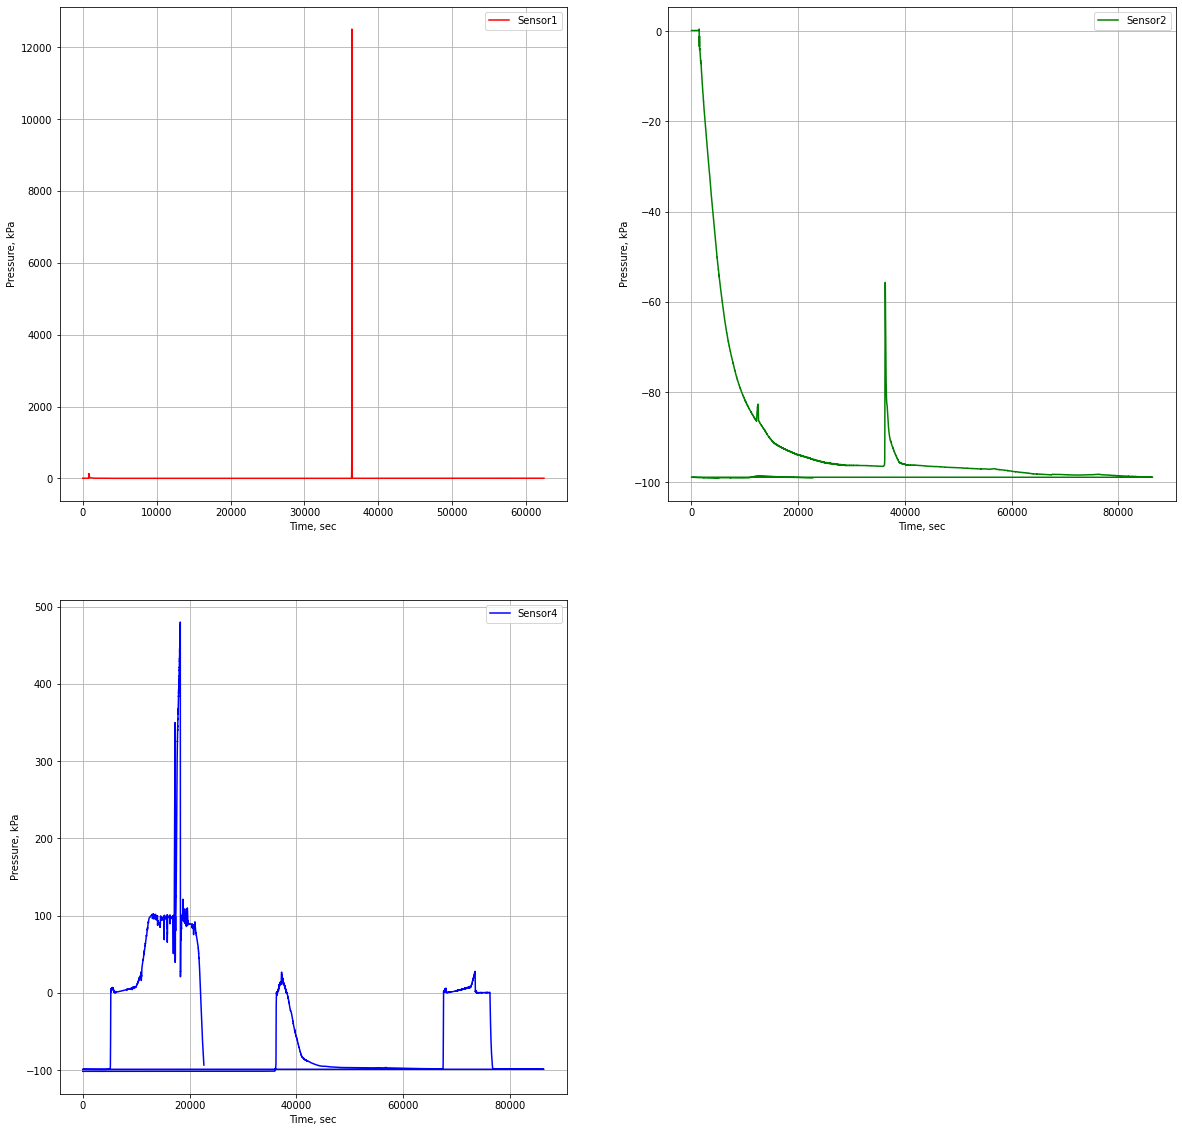

In [19]:
pressure_plot(sensor_surf, sensor_2, sensor_4)

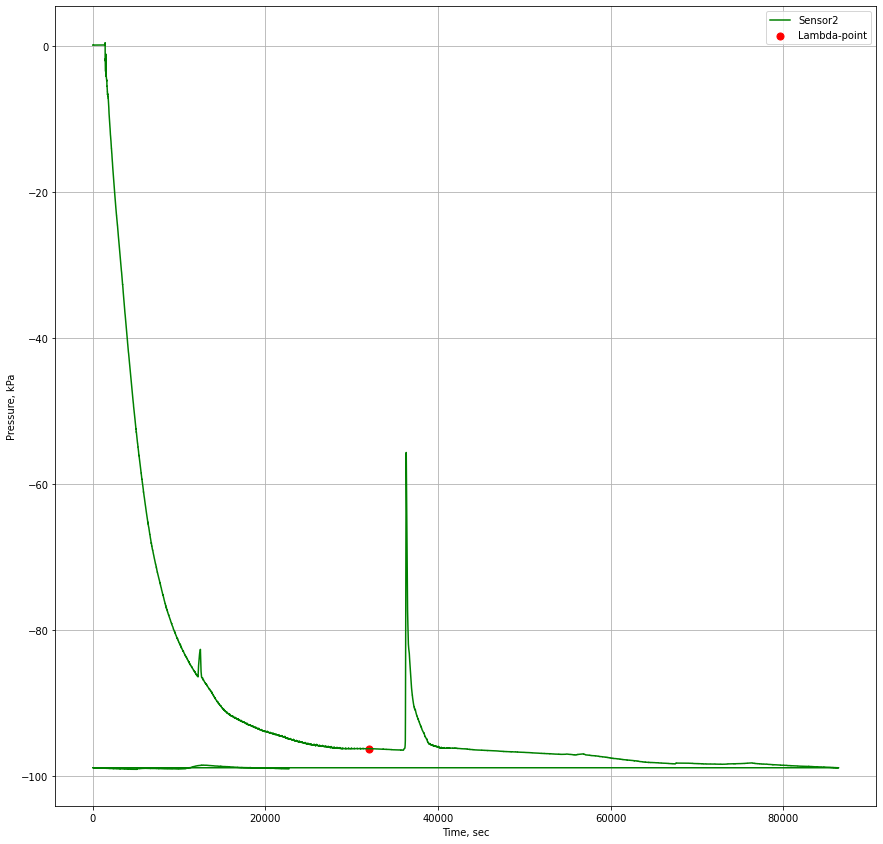

In [37]:
x_data = sensor_2['TotalTime']
y_data = sensor_2['Pressure, kPa']
plt.figure(figsize=(50, 50))

ax = plt.subplot(3,3,1)
plt.plot(x_data, y_data, color="green", label="Sensor2")
plt.scatter(32000,-96.286, color="red", label="Lambda-point", s=50)
plt.xlabel("Time, sec")
plt.ylabel("Pressure, kPa")
plt.grid(True)
plt.legend()

In [36]:
sensor_2.loc[sensor_2['TotalTime'] == 32000]

,"Pressure, kPa",Time,Date,TotalTime
31913,-96.286,23:59:11.931,12.12.20,32000


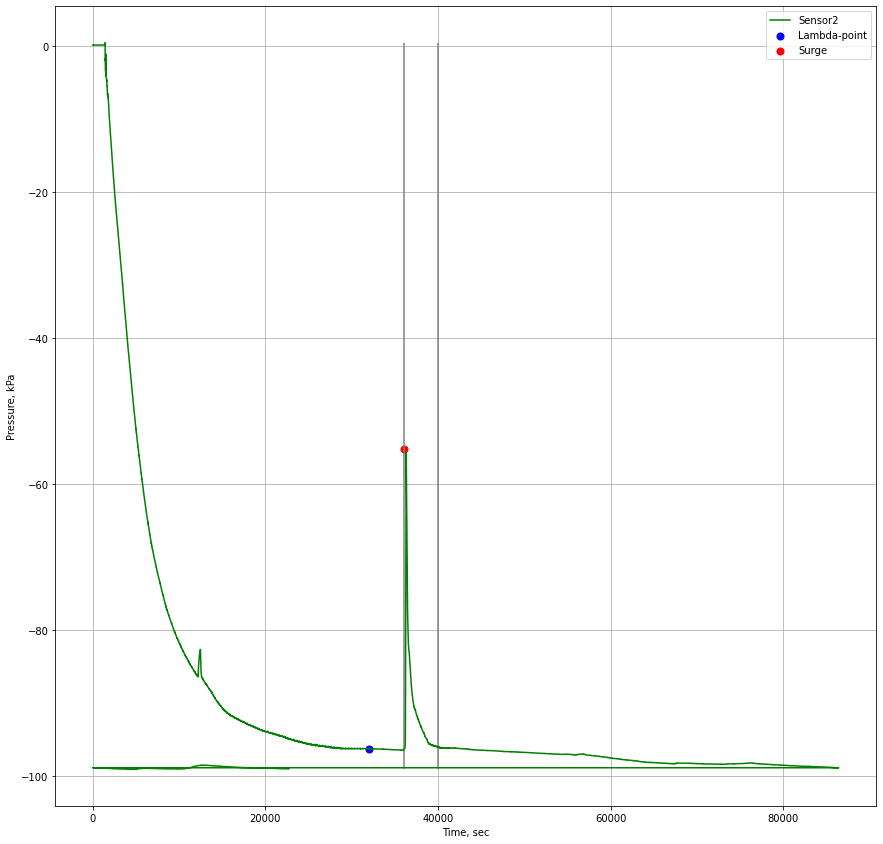

In [68]:
x_data = sensor_2['TotalTime']
y_data = sensor_2['Pressure, kPa']
plt.figure(figsize=(50, 50))

ax = plt.subplot(3,3,1)
ax.vlines(40000, y_data.min(), y_data.max(), color = 'gray')
ax.vlines(36000, y_data.min(), y_data.max(), color = 'gray')
plt.plot(x_data, y_data, color="green", label="Sensor2")
plt.scatter(32000,-96.286, color="blue", label="Lambda-point", s=50)
plt.scatter(36000,-55.286, color="red", label="Surge", s=50)
plt.xlabel("Time, sec")
plt.ylabel("Pressure, kPa")
plt.grid(True)
plt.legend()

In [7]:
temp_data = pd.read_csv("tempLogs.xls", delimiter=',')
level_data = pd.read_csv("levelLogs.xls", delimiter=',')

In [8]:
temp_data['TotalTime'] = 0
dataparser(temp_data)
level_data['TotalTime'] = 0
dataparser(level_data)

In [9]:
deltatime(temp_data)
deltatime(level_data)

In [10]:
x_data = temp_data["TotalTime"]
y_data = temp_data.drop(["Time", "Date", "TotalTime"], 1)

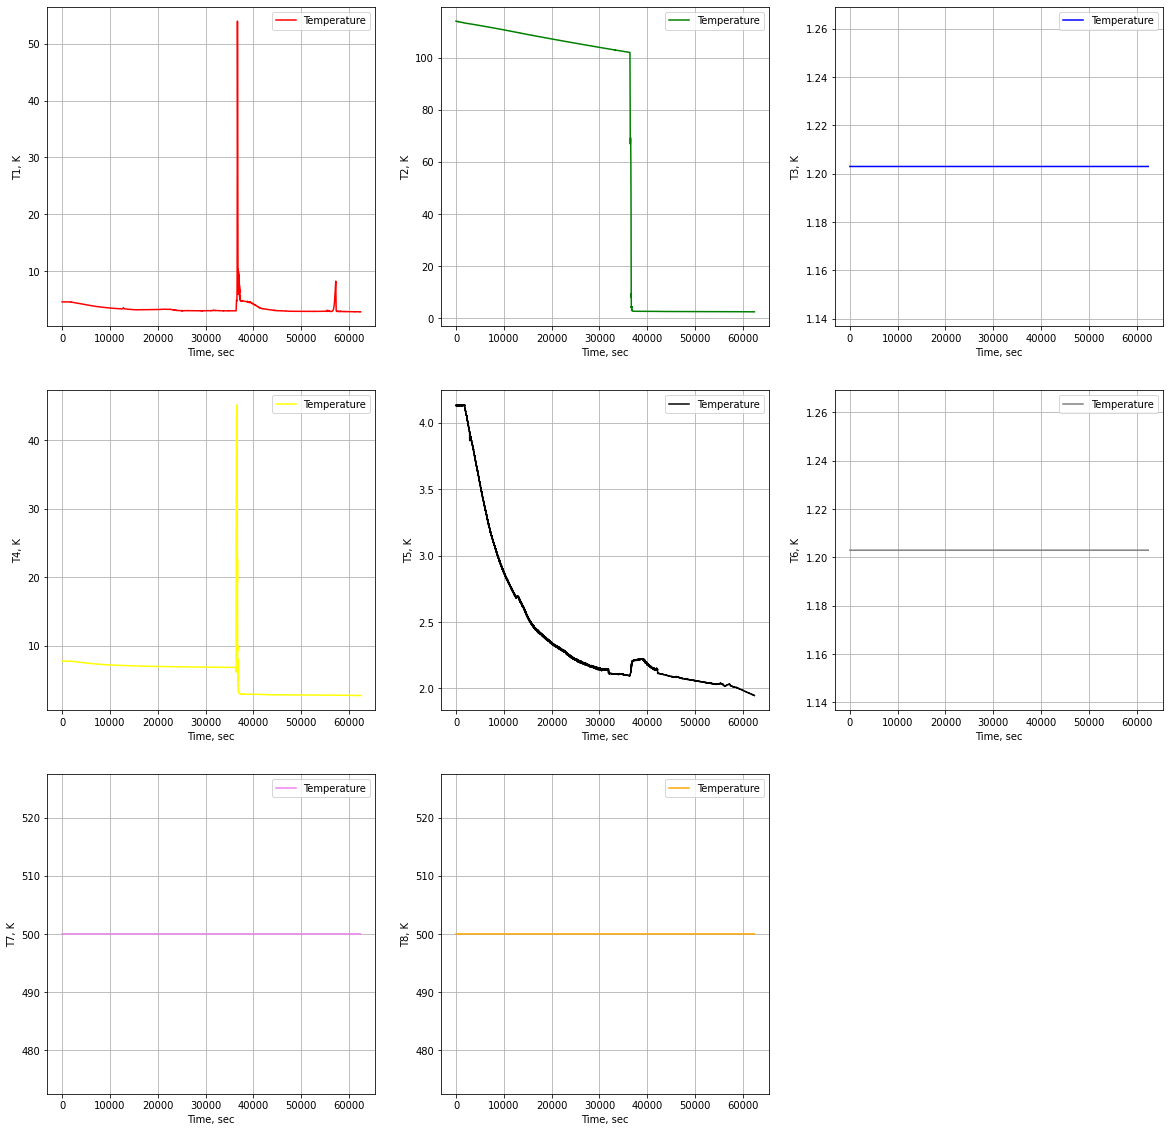

In [11]:
plt.figure(figsize=(20, 20))
colormap = ["red", "green", "blue", "yellow", "black", "gray", "violet", "orange"]
for i in range(1,9,1):
    ax = plt.subplot(3,3,i)
    plt.plot(x_data, y_data["T"+str(i)], color=colormap[i-1], label="Temperature")
    plt.xlabel("Time, sec")
    plt.ylabel("T{}, K".format(i))
    plt.grid(True)
    plt.legend()

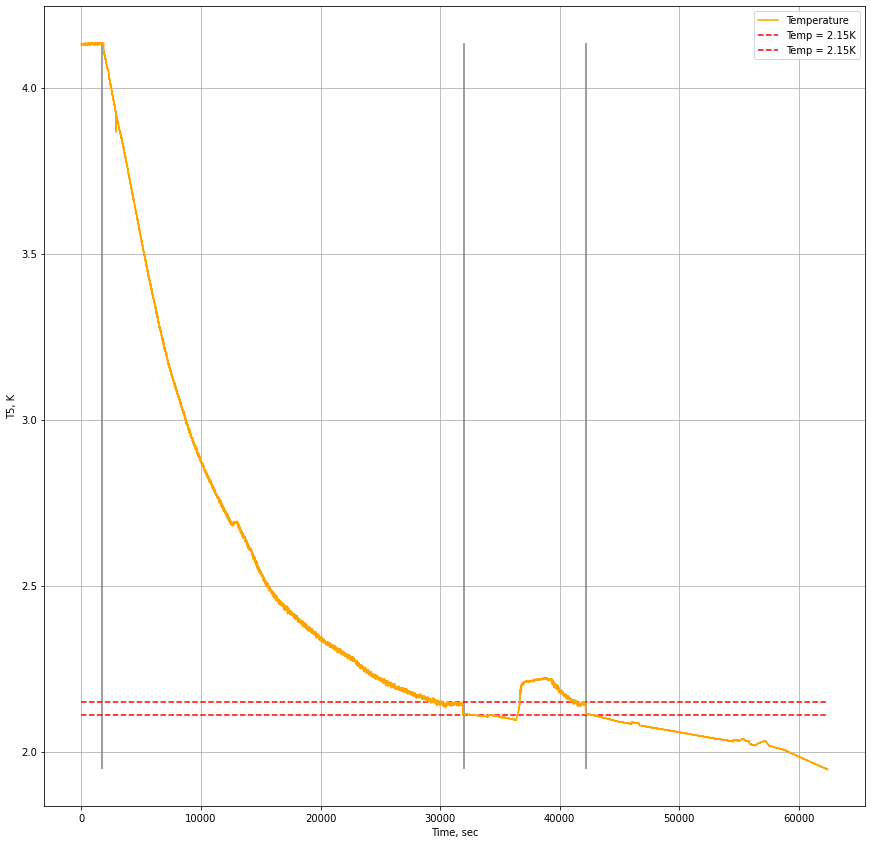

In [13]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,1)
ax.vlines(32000, y_data["T5"].min(), y_data["T5"].max(), color = 'gray')
ax.vlines(1700, y_data["T5"].min(), y_data["T5"].max(), color = 'gray')
ax.vlines(42250, y_data["T5"].min(), y_data["T5"].max(), color = 'gray')
ax.hlines(2.15, x_data.min(), x_data.max(), color = 'r', linestyles = "dashed", label = "Temp = 2.15K")
ax.hlines(2.11, x_data.min(), x_data.max(), color = 'r', linestyles = "dashed", label = "Temp = 2.15K")
plt.plot(x_data, y_data["T5"], color="orange", label="Temperature")
plt.xlabel("Time, sec")
plt.ylabel("T{}, K".format(5))
plt.grid(True)
plt.legend()

No handles with labels found to put in legend.


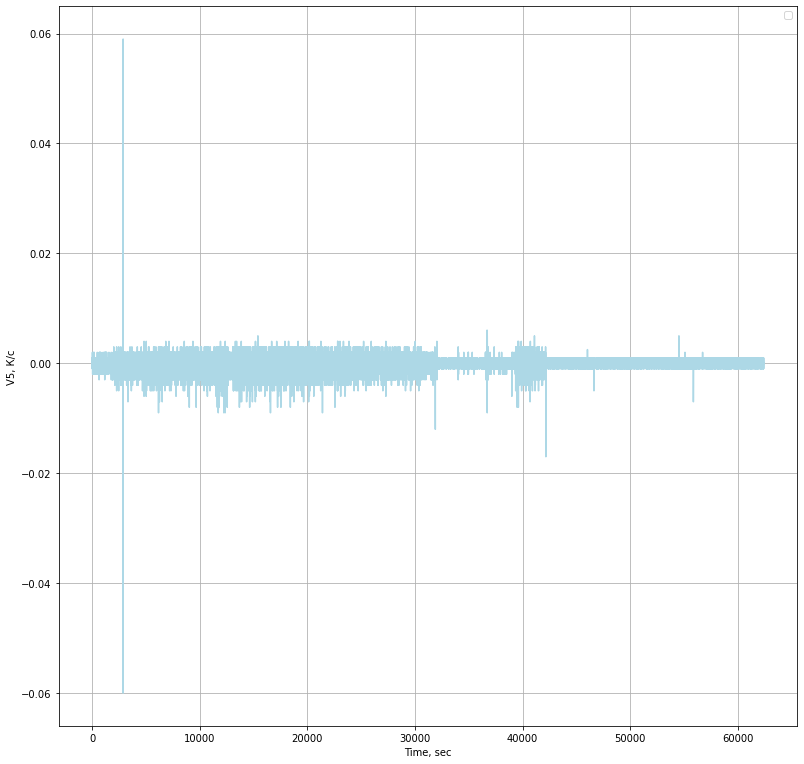

In [15]:
plt.figure(figsize=(45, 45))
ax = plt.subplot(3,3,1)
y_der = np.diff(y_data["T5"].to_numpy())/np.diff(x_data)
plt.plot(x_data[:-1], y_der, color="lightblue")
# plt.scatter(17885, -0.015, color="blue", label="Lambda-point, V= -0.015 1/K", s=50)
# plt.scatter(22055, -0.001, color="green", label="T= 2.0К, V= -0.001 1/K", s=50)
# plt.scatter(29497, -0.001, color="black", label="T= 1.9К, V= -0.001 1/K", s=50)
# plt.scatter(33800, -0.001, color="violet", label="T= 1.847К, V= -0.001 1/K", s=50)
plt.xlabel("Time, sec")
plt.ylabel("V{}, К/с".format(5))
plt.grid(True)
plt.legend()

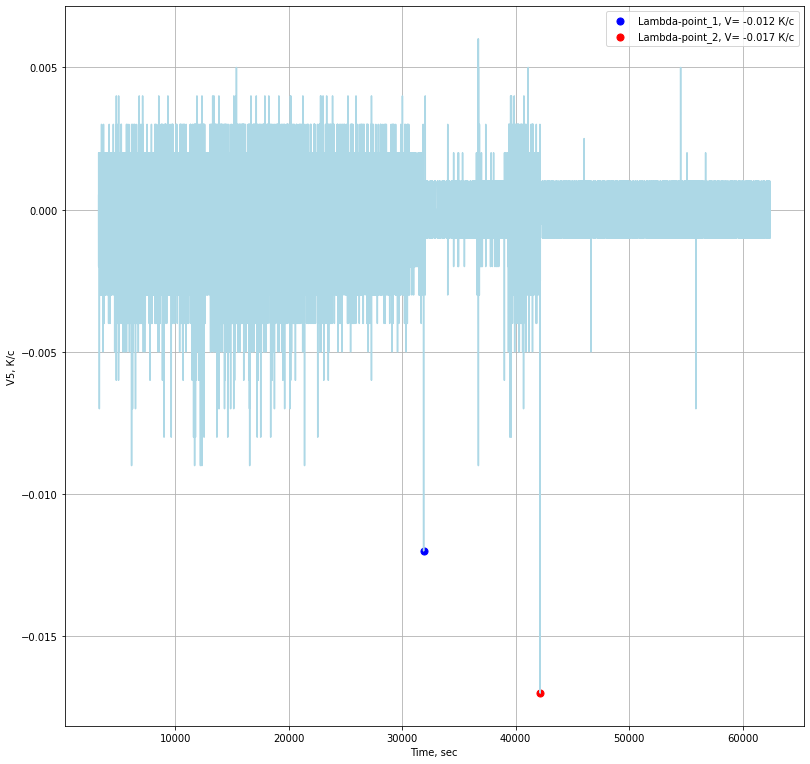

In [16]:
plt.figure(figsize=(45, 45))
ax = plt.subplot(3,3,1)
y_der = np.diff(y_data["T5"].to_numpy())/np.diff(x_data)
plt.plot(x_data[3000:-1], y_der[3000:], color="lightblue")
plt.scatter(31900, -0.012, color="blue", label="Lambda-point_1, V= -0.012 К/с", s=50)
plt.scatter(42150, -0.017, color="red", label="Lambda-point_2, V= -0.017 К/с", s=50)
plt.xlabel("Time, sec")
plt.ylabel("V{}, К/с".format(5))
plt.grid(True)
plt.legend()

# Модуль интерполяции

In [17]:
temp_data.loc[temp_data['TotalTime'] == 55000]

,T1,T2,T3,T4,T5,T6,T7,T8,Date,Time,TotalTime
50641,2.877,2.571,1.203,2.784,2.033,1.203,500.0,500.0,13.12.2020,6:15:40,55000


In [18]:
temp_data.loc[temp_data['T5'] == 2.0]

,T1,T2,T3,T4,T5,T6,T7,T8,Date,Time,TotalTime
54359,2.848,2.549,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:22:58,59038
54360,2.848,2.548,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:22:59,59039
54361,2.847,2.549,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:00,59040
54363,2.847,2.549,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:02,59042
54366,2.848,2.549,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:05,59045
54367,2.848,2.548,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:06,59046
54373,2.851,2.549,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:13,59053
54374,2.853,2.548,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:14,59054
54375,2.855,2.548,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:15,59055
54376,2.853,2.549,1.203,2.766,2.0,1.203,500.0,500.0,13.12.2020,7:23:16,59056


In [19]:
x_x = [[1700, 5000, 30000, 32000], 
     [32000, 33000, 35000, 36400], 
     [36500, 37500, 38500, 39200], 
     [39200, 40000, 41000, 42000],
     [42250, 48000, 55000, 62418]]
y_y = [[4.132, 3.546, 2.148, 2.145], 
     [2.113, 2.109, 2.104, 2.098], 
     [2.114, 2.211, 2.218, 2.217], 
     [2.217, 2.18, 2.157, 2.141],
     [2.113, 2.071, 2.033, 1.946]]

In [20]:
X_1 = np.array([[1, x_x[0][0], x_x[0][0]**2, x_x[0][0]**3],
              [1, x_x[0][1], x_x[0][1]**2, x_x[0][1]**3], 
              [1, x_x[0][2], x_x[0][2]**2, x_x[0][2]**3], 
              [1, x_x[0][3], x_x[0][3]**2, x_x[0][3]**3],])
print(X_1, '\n')

#Зададим вектор решений
b_1 = np.array(y_y[0])
print(b_1)

[[             1           1700        2890000     4913000000]
 [             1           5000       25000000   125000000000]
 [             1          30000      900000000 27000000000000]
 [             1          32000     1024000000 32768000000000]] 

[4.132 3.546 2.148 2.145]


In [21]:
X_2 = np.array([[1, x_x[1][0], x_x[1][0]**2, x_x[1][0]**3],
              [1, x_x[1][1], x_x[1][1]**2, x_x[1][1]**3], 
              [1, x_x[1][2], x_x[1][2]**2, x_x[1][2]**3], 
              [1, x_x[1][3], x_x[1][3]**2, x_x[1][3]**3],])
print(X_2, '\n')

#Зададим вектор решений
b_2 = np.array(y_y[1])
print(b_2)

[[             1          32000     1024000000 32768000000000]
 [             1          33000     1089000000 35937000000000]
 [             1          35000     1225000000 42875000000000]
 [             1          36400     1324960000 48228544000000]] 

[2.113 2.109 2.104 2.098]


In [22]:
X_3 = np.array([[1, x_x[2][0], x_x[2][0]**2, x_x[2][0]**3],
              [1, x_x[2][1], x_x[2][1]**2, x_x[2][1]**3], 
              [1, x_x[2][2], x_x[2][2]**2, x_x[2][2]**3], 
              [1, x_x[2][3], x_x[2][3]**2, x_x[2][3]**3],])
print(X_3, '\n')

#Зададим вектор решений
b_3 = np.array(y_y[2])
print(b_3)

[[             1          36500     1332250000 48627125000000]
 [             1          37500     1406250000 52734375000000]
 [             1          38500     1482250000 57066625000000]
 [             1          39200     1536640000 60236288000000]] 

[2.114 2.211 2.218 2.217]


In [23]:
X_4 = np.array([[1, x_x[3][0], x_x[3][0]**2, x_x[3][0]**3],
              [1, x_x[3][1], x_x[3][1]**2, x_x[3][1]**3], 
              [1, x_x[3][2], x_x[3][2]**2, x_x[3][2]**3], 
              [1, x_x[3][3], x_x[3][3]**2, x_x[3][3]**3]])
print(X_4, '\n')

#Зададим вектор решений
b_4 = np.array(y_y[3])
print(b_4)

[[             1          39200     1536640000 60236288000000]
 [             1          40000     1600000000 64000000000000]
 [             1          41000     1681000000 68921000000000]
 [             1          42000     1764000000 74088000000000]] 

[2.217 2.18  2.157 2.141]


In [24]:
X_5 = np.array([[1, x_x[4][0], x_x[4][0]**2, x_x[4][0]**3],
              [1, x_x[4][1], x_x[4][1]**2, x_x[4][1]**3], 
              [1, x_x[4][2], x_x[4][2]**2, x_x[4][2]**3], 
              [1, x_x[4][3], x_x[4][3]**2, x_x[4][3]**3]])
print(X_5, '\n')

#Зададим вектор решений
b_5 = np.array(y_y[4])
print(b_5)

[[              1           42250      1785062500  75418890625000]
 [              1           48000      2304000000 110592000000000]
 [              1           55000      3025000000 166375000000000]
 [              1           62418      3896006724 243180947698632]] 

[2.113 2.071 2.033 1.946]


In [25]:
def linf_2(x, w): # w - массив коэффициентов многочлена
    return w[3] * (x**3) + w[2] * (x**2) + w[1] * x + w[0]

In [26]:
import scipy.linalg
w_1 = scipy.linalg.solve(X_1, b_1)
print(w_1)

[ 4.48963384e+00 -2.22164371e-04  7.06429183e-09 -7.53542728e-14]


In [27]:
w_2 = scipy.linalg.solve(X_2, b_2)
print(w_2)

[ 1.13807647e+01 -8.12630634e-04  2.38002292e-08 -2.33002292e-13]


In [28]:
w_3 = scipy.linalg.solve(X_3, b_3)
print(w_3)

[-8.44534752e+02  6.59778209e-02 -1.71341737e-06  1.48303766e-11]


In [29]:
w_4 = scipy.linalg.solve(X_4, b_4)
print(w_4)

[ 2.40490000e+02 -1.72632262e-02  4.17160714e-07 -3.36309524e-12]


In [30]:
w_5 = scipy.linalg.solve(X_5, b_5)
print(w_5)

[ 5.95007999e+00 -2.23057598e-04  4.35344787e-09 -2.89592300e-14]


In [31]:
x_1 = np.linspace(1700, 32000, num=31308)
z_1 = linf_2(x_1, w_1)

x_2 = np.linspace(32000, 36400, num=31308)
z_2 = linf_2(x_2, w_2)

x_3 = np.linspace(36400, 39200, num=31308)
z_3 = linf_2(x_3, w_3)

x_4 = np.linspace(39200, 42000, num=31308)
z_4 = linf_2(x_4, w_4)

x_5 = np.linspace(42250, 62418, num=31308)
z_5 = linf_2(x_5, w_5)

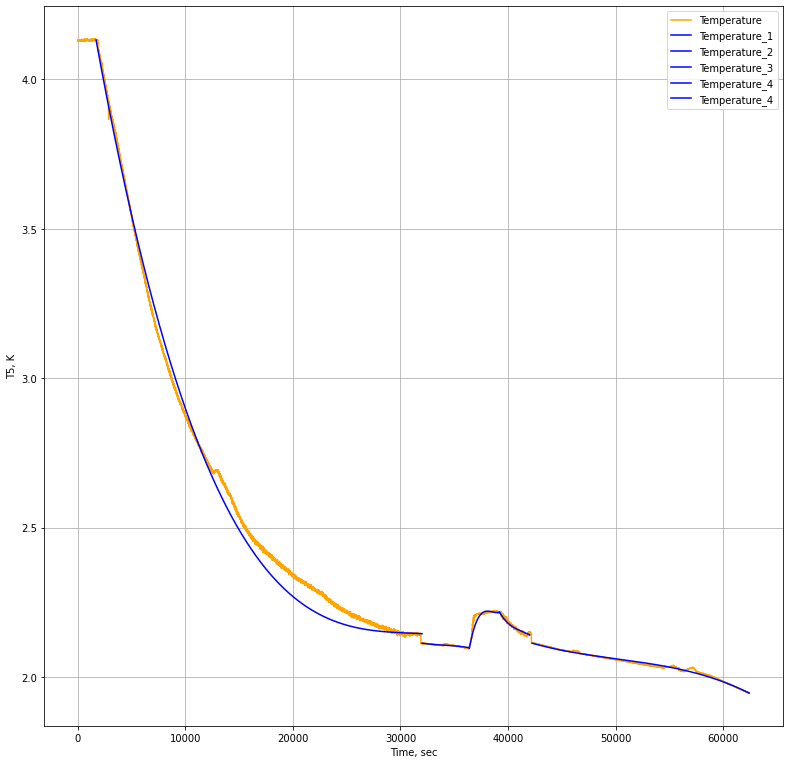

In [32]:
plt.figure(figsize=(45, 45))
ax = plt.subplot(3,3,1)
plt.plot(x_data, y_data["T5"], color="orange", label="Temperature")

plt.plot(x_1, z_1, color="blue", label="Temperature_1")
plt.plot(x_2, z_2, color="blue", label="Temperature_2")
plt.plot(x_3, z_3, color="blue", label="Temperature_3")
plt.plot(x_4, z_4, color="blue", label="Temperature_4")
plt.plot(x_5, z_5, color="blue", label="Temperature_4")
plt.xlabel("Time, sec")
plt.ylabel("T{}, K".format(5))
plt.grid(True)
plt.legend()

In [ ]:
ax.vlines

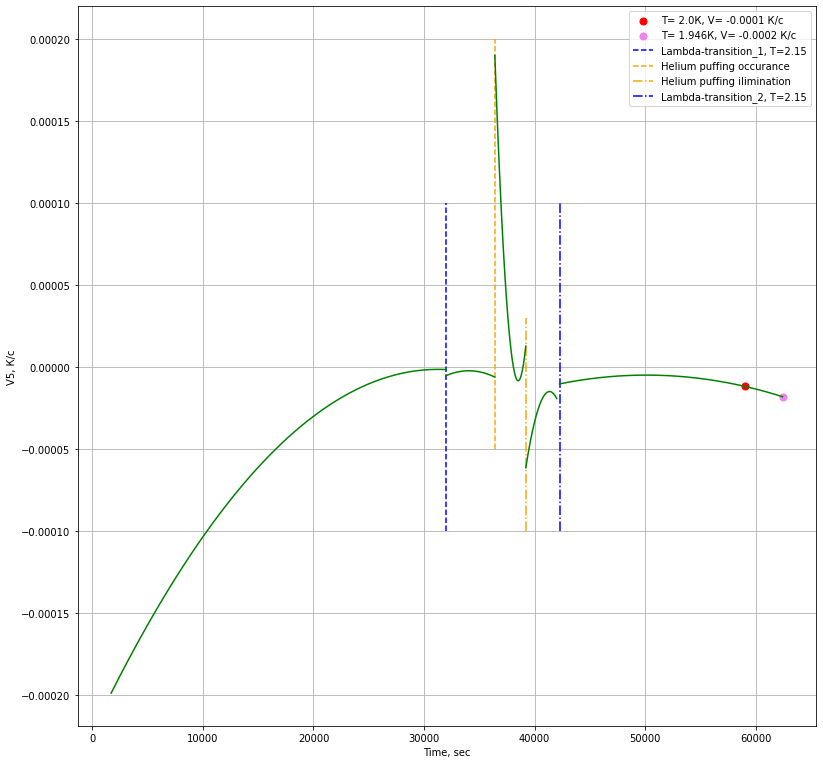

In [34]:
plt.figure(figsize=(45, 45))
ax = plt.subplot(3,3,1)
y_der1 = np.diff(z_1)/np.diff(x_1)
y_der2 = np.diff(z_2)/np.diff(x_2)
y_der3 = np.diff(z_3)/np.diff(x_3)
y_der4 = np.diff(z_4)/np.diff(x_4)
y_der5 = np.diff(z_5)/np.diff(x_5)

plt.plot(x_1[:-1], y_der1, color="green")
plt.plot(x_2[:-1], y_der2, color="green")
plt.plot(x_3[:-1], y_der3, color="green")
plt.plot(x_4[:-1], y_der4, color="green")
plt.plot(x_5[:-1], y_der5, color="green")


plt.scatter(59057, -0.0000115, color="red", label="T= 2.0К, V= -0.0001 К/с", s=50)
plt.scatter(62418, -0.0000180, color="violet", label="T= 1.946К, V= -0.0002 К/с", s=50)


ax.vlines(32000, -0.0001, 0.0001, color = 'blue', linestyles = "dashed", label = "Lambda-transition_1, T=2.15")
ax.vlines(36400, -0.00005, 0.00020, color = 'orange', linestyles = "dashed", label = "Helium puffing occurance")
ax.vlines(39200, -0.00010, 0.00003, color = 'orange', linestyles = "dashdot", label = "Helium puffing ilimination")
ax.vlines(42250, -0.0001, 0.0001, color = 'blue', linestyles = "dashdot", label = "Lambda-transition_2, T=2.15")
plt.xlabel("Time, sec")
plt.ylabel("V{}, К/с".format(5))
plt.grid(True)
plt.legend()

In [27]:
temp_data = temp_data.drop(["T1", "T2", "T3", "T4", "T8", "T6", "T7"], 1)
temp_data.loc[temp_data['TotalTime'] == temp_data['TotalTime'].max()]

,T5,Date,Time,TotalTime
57472,1.946,13.12.2020,8:19:18,62418


In [69]:
temp_data.loc[temp_data['TotalTime'] == temp_data['TotalTime'].min()]

,T5,Date,Time,TotalTime
0,4.131,12.12.2020,14:59:00,0


In [29]:
x_data_volume = level_data["TotalTime"]
y_data_volume = level_data["Level, cm"]

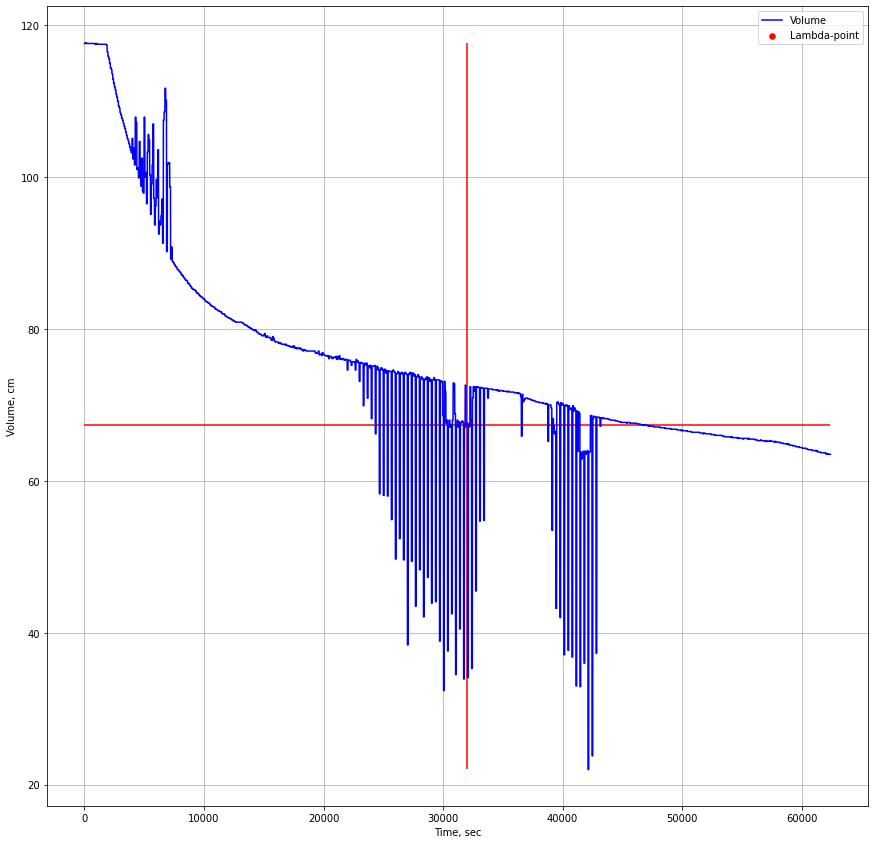

In [30]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,1)
ax.vlines(32000, y_data_volume.min(), y_data_volume.max(), color = 'r')
ax.hlines(67.4, x_data_volume.min(), x_data_volume.max(), color = 'r')
plt.plot(x_data_volume, y_data_volume, color="blue", label="Volume")
plt.scatter(32000, 67.4, color="red", label="Lambda-point", s=30)
plt.xlabel("Time, sec")
plt.ylabel("Volume, cm")
plt.grid(True)
plt.legend()

In [31]:
temp_data.loc[temp_data['T5'] == 2.15]

,T5,Date,Time,TotalTime
26562,2.15,12.12.2020,22:59:47,28847
26899,2.15,12.12.2020,23:05:53,29213
26909,2.15,12.12.2020,23:06:03,29223
26911,2.15,12.12.2020,23:06:06,29226
26913,2.15,12.12.2020,23:06:08,29228
...,...,...,...,...
38161,2.15,13.12.2020,2:29:47,41447
38583,2.15,13.12.2020,2:37:25,41905
38615,2.15,13.12.2020,2:38:00,41940
38705,2.15,13.12.2020,2:39:38,42038


In [32]:
level_data.loc[level_data['TotalTime'] == 32000]

,"Level, cm",Date,Time,TotalTime
31990,67.4,12.12.2020,23:52:23,32000


In [33]:
level_data.loc[level_data['TotalTime'] == level_data['TotalTime'].max()]

,"Level, cm",Date,Time,TotalTime
62397,63.5,13.12.2020,8:19:18,62415


In [34]:
level_data.loc[level_data['TotalTime'] == level_data['TotalTime'].min()]

,"Level, cm",Date,Time,TotalTime
0,117.6,12.12.2020,14:59:03,0
